# 2025.03.21

1. 归一化奖励$$reward=\frac{reward-baseRevenue.mean}{baseRevenue.var}$$
归一化后，0出现的概率有所提升
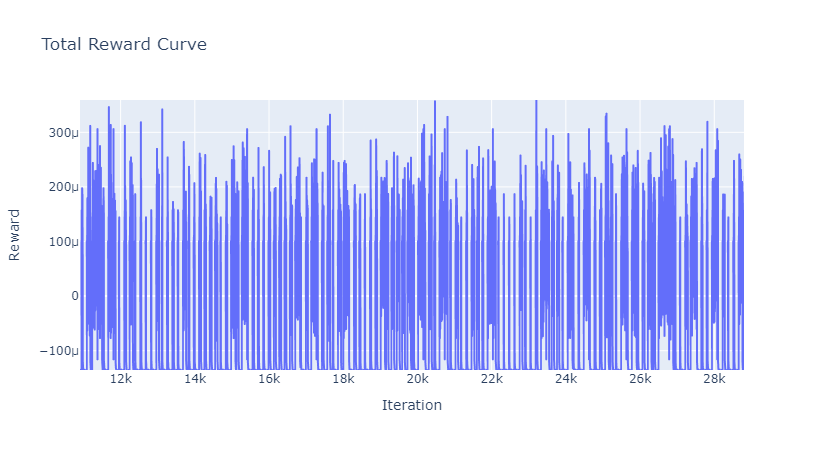
（此非total reward，而为time reward）

2. 打印actor.stat_dict()与critic.stat_dict()，未见有梯度消失情况
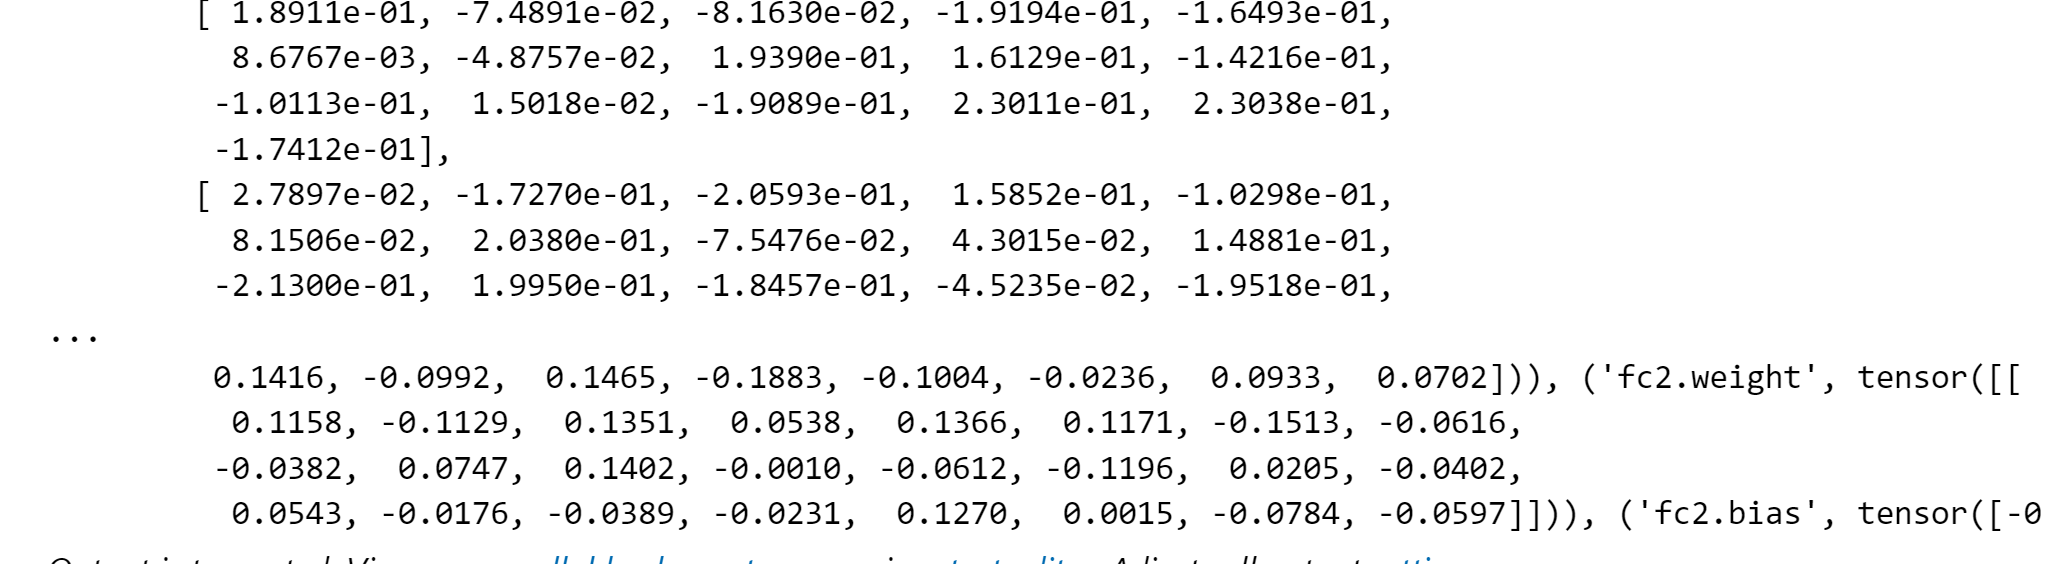

3. 不改变其他条件，仅降低问题规模，得到如下结果：
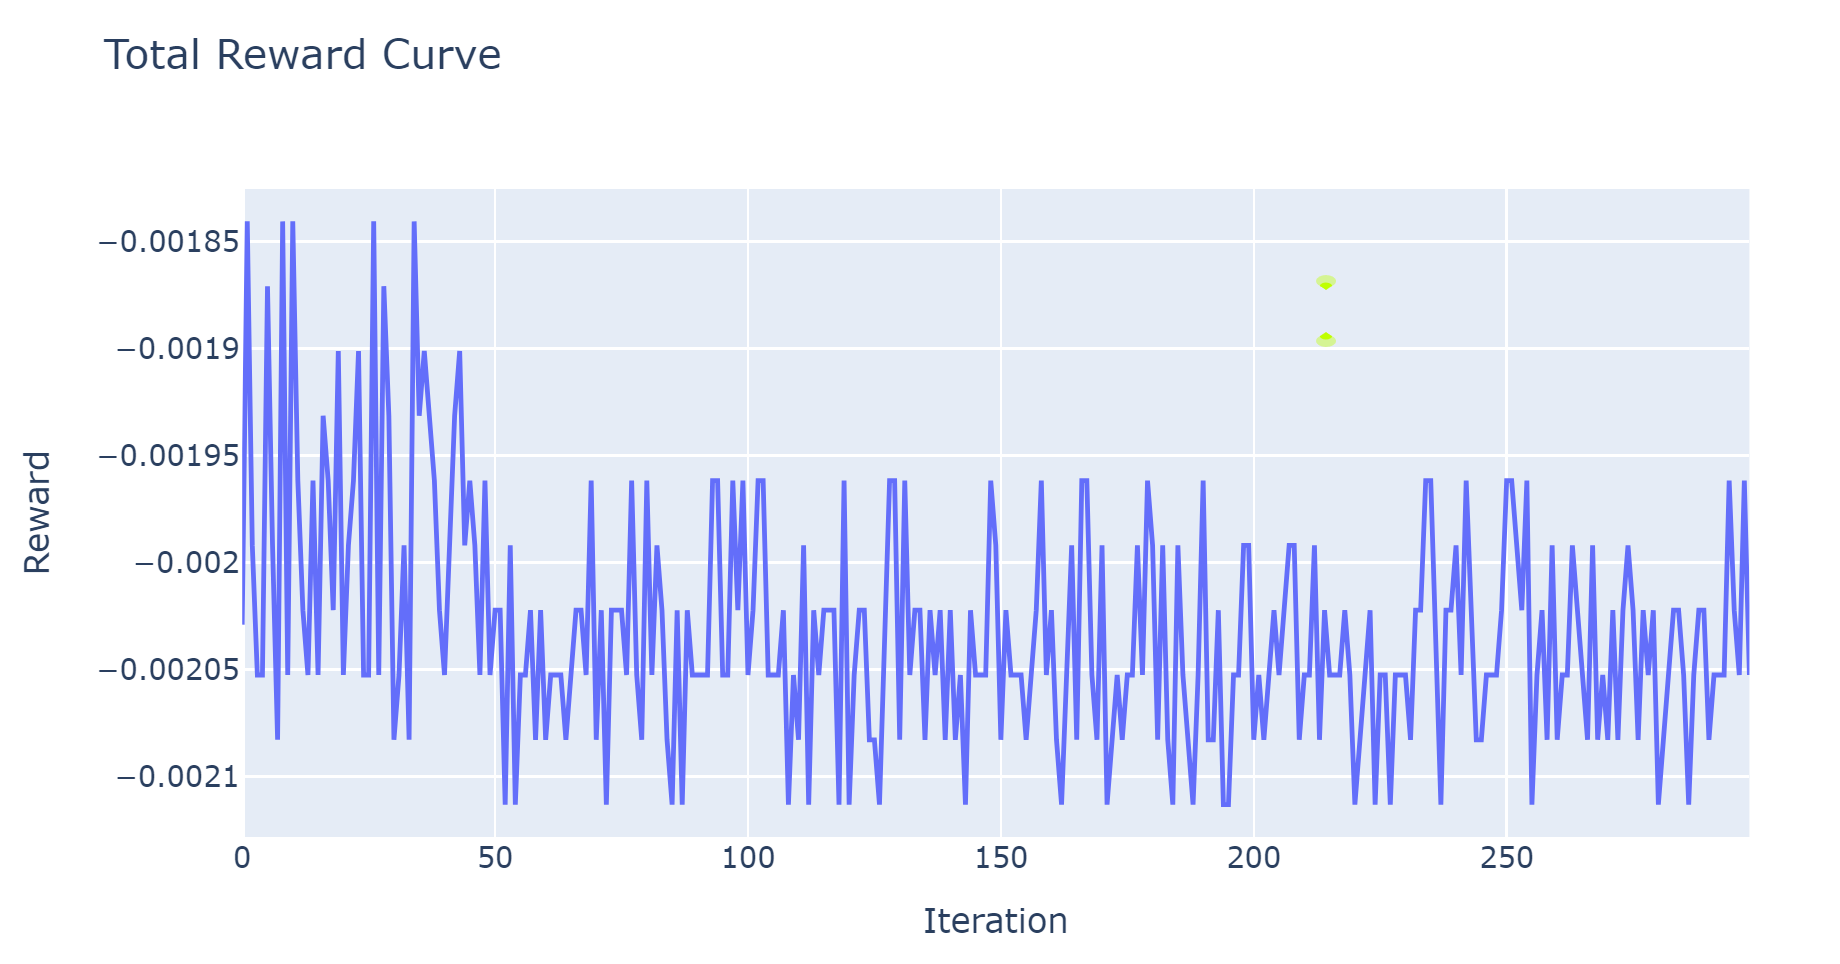

4. 今日提醒：tool_func中order_generator函数引用order_feasible_action不当，当改为list_str(G.get_intercity_path(*order.virtual_route()))，故在Lower_layer中有两处需更正

# 2025.03.23

1. 新增函数`vetor_order_detial()`，用于提供更为详细的可行城市信息；修改了`order.path_key`中的错误;修正了`Lower_Layer`不能调用`list_str()`的问题（循环`import`）
2. 将视频的帧率降低

# 2025.03.24

1. `feasible_binary_action`有处错误，每次循环加2，因有`range`与`j++`
2. 每当有最好解（0）时，下一次求解建立约束条件就会报错，在`Lower_Layer`中第145行，打印信息得出`order.matched`为`True`，这是不应该的。之前由于忘记删去`try`模块导致该问题一直没被发现。目前为解决，先写`env.cities_reload(city_node)`以排查初始化问题

# 2025.03.26

1. 先前为`city_node`诸属性设置`property`而无`setter`，实在多此一举，其中谬误如今才发觉。

# 2025.03.27

1. 将`mean`与`var`替换为全局最好的，结果不佳，没有好的提升

# 2025.03.28

1. 如果仅对好样本每n轮学一次，那么某种程度上可以确定下确界。
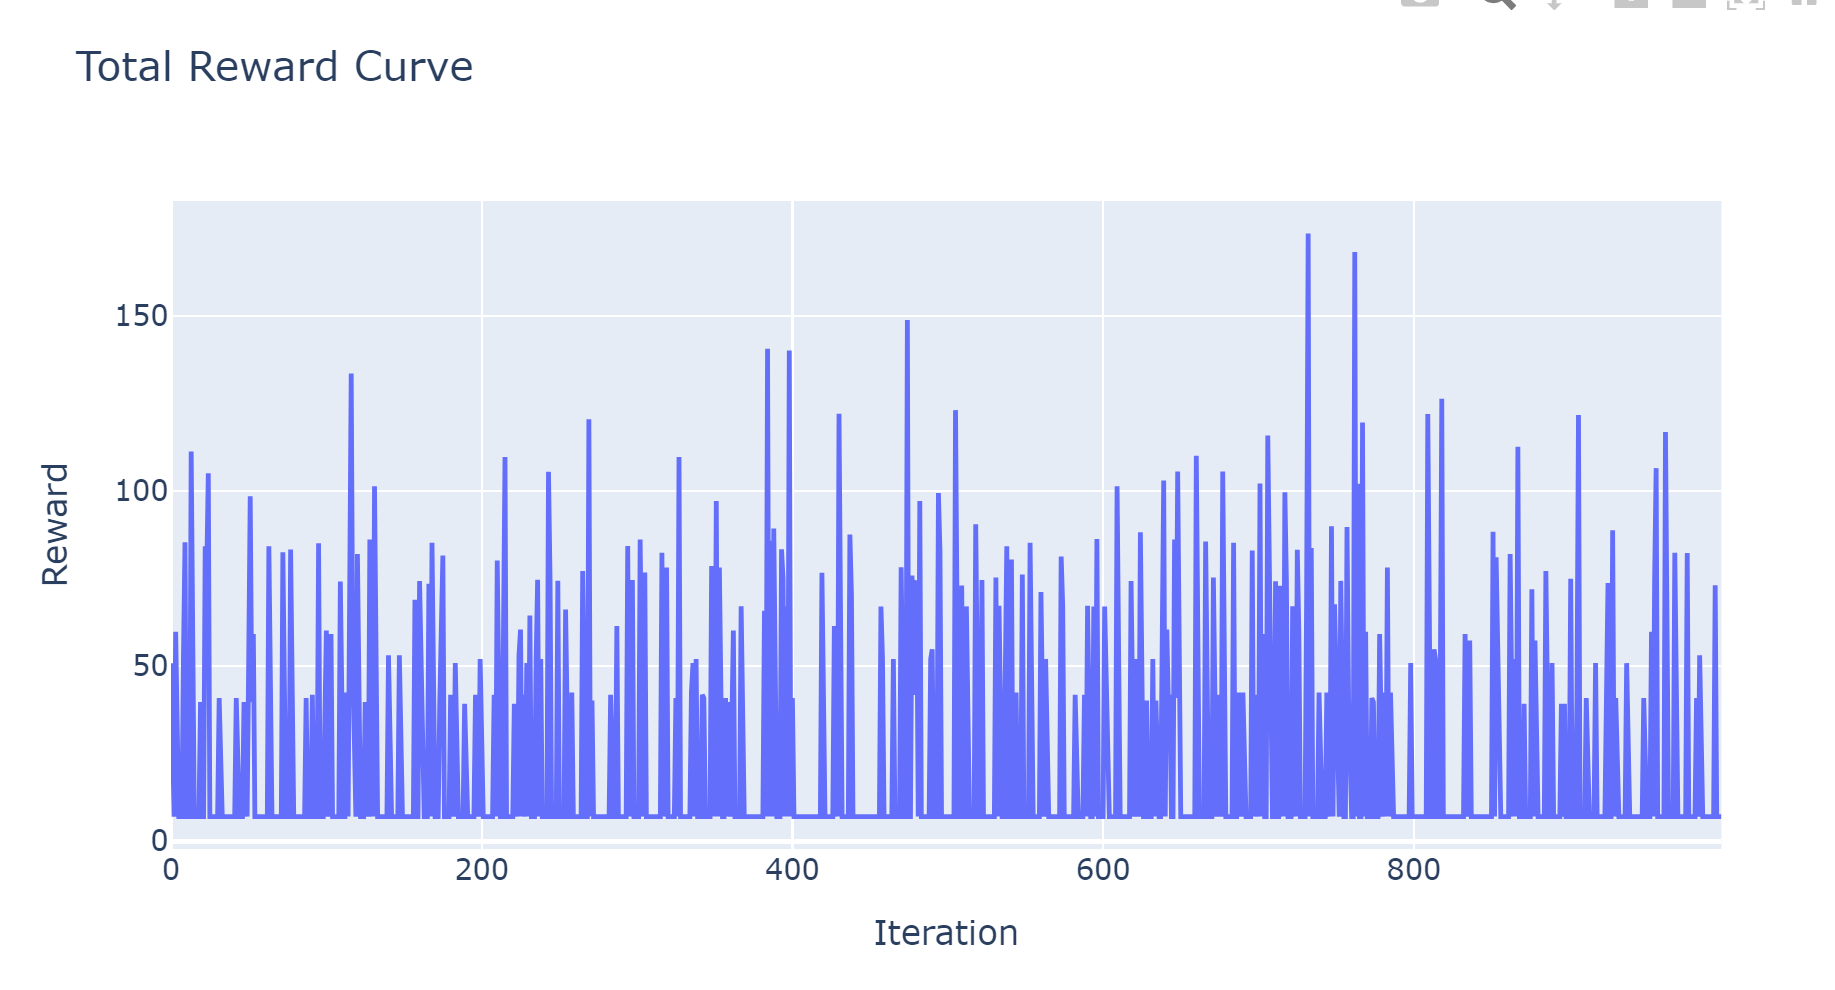

# 2025.03.29

1. 未改变其他情形下，仅仅调整更新位置（不再每一步，而是统一结束时），未见收敛

# 2025.03.30

1. 令人感到沮丧的是，之前`actor_loss`,`critic_loss`竟都是`float`对象，难怪未曾有`.backward()`的报错，是否更新也未可知。按照动手学改为`ppo`后，步骤类似但无论何处置`retain_graph=True`皆有报错，内容不一。此外还要许多长度未对齐等问题
2. 修复了`ppo`的诸多问题，使之能正常运作，但是`retain_graph=True`尚未解决
3. 修复了`retain_graph`的问题，但仍不收敛
4. 增加了`ppo`中的`epoch`
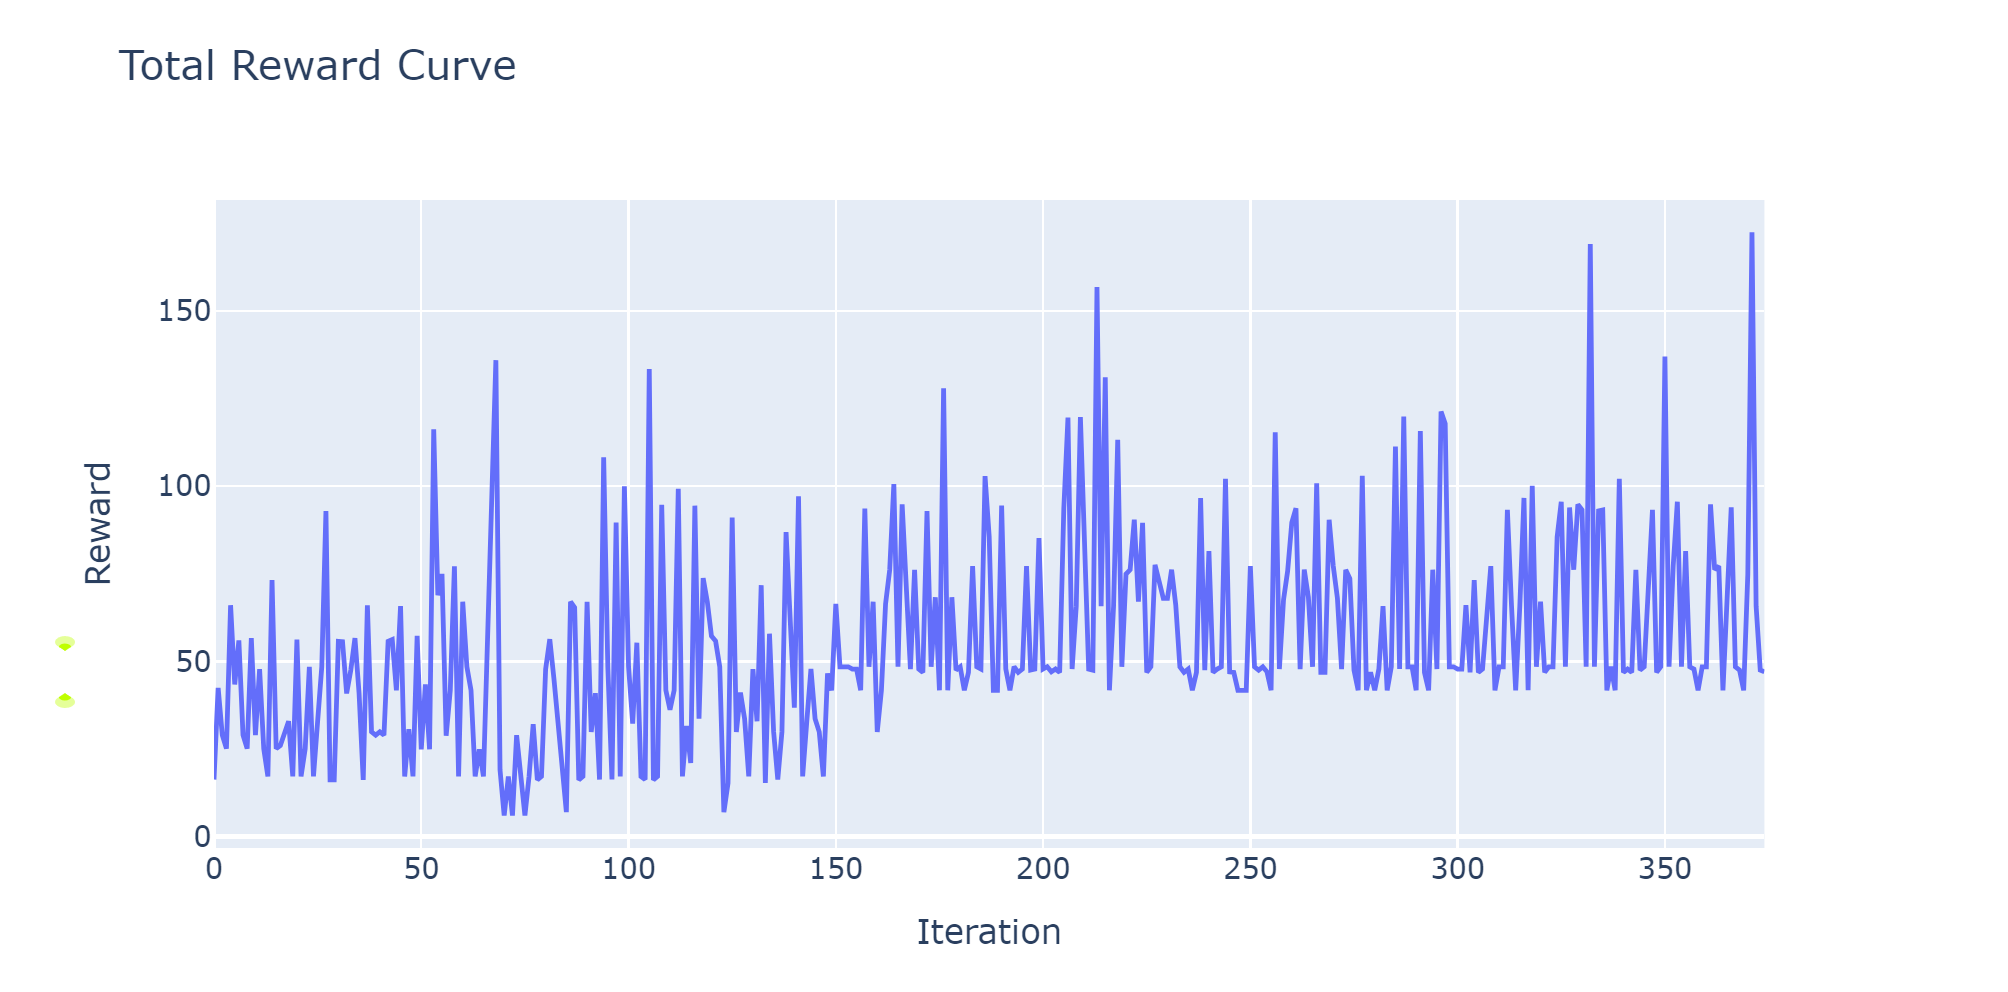
此为`epoch=10`
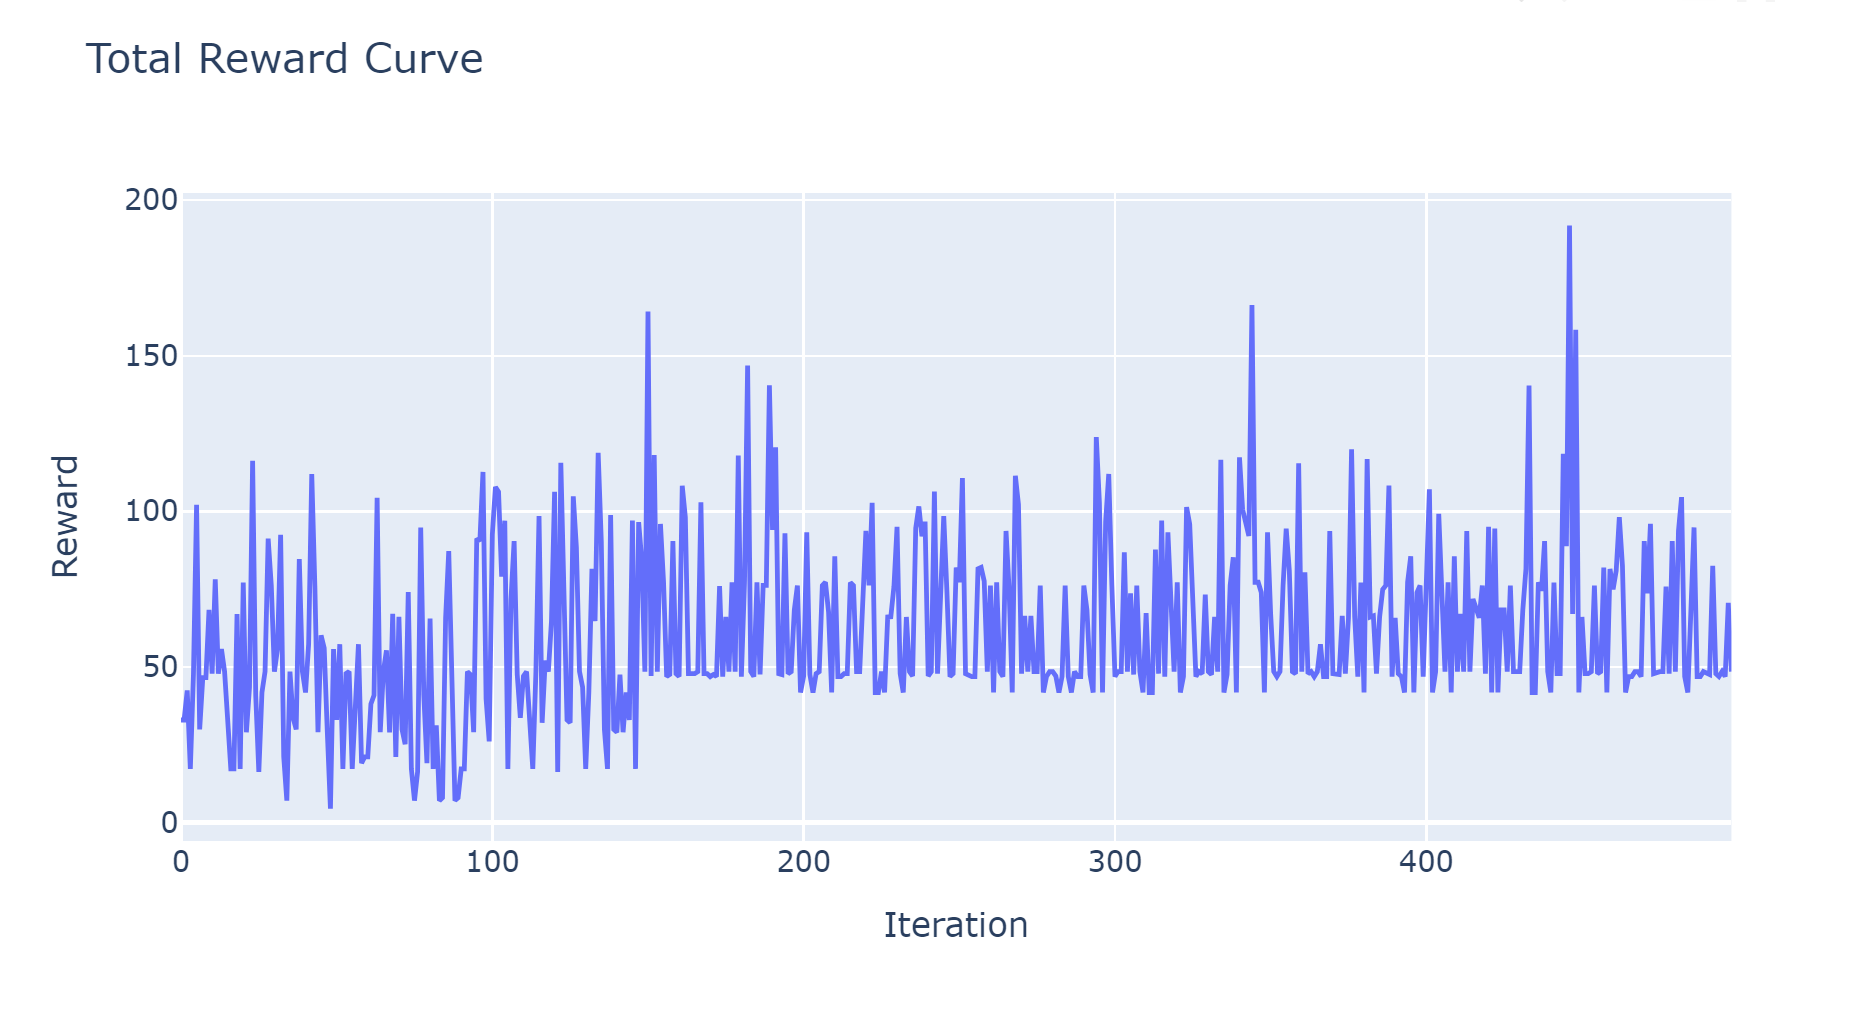
此为`epoch=20`
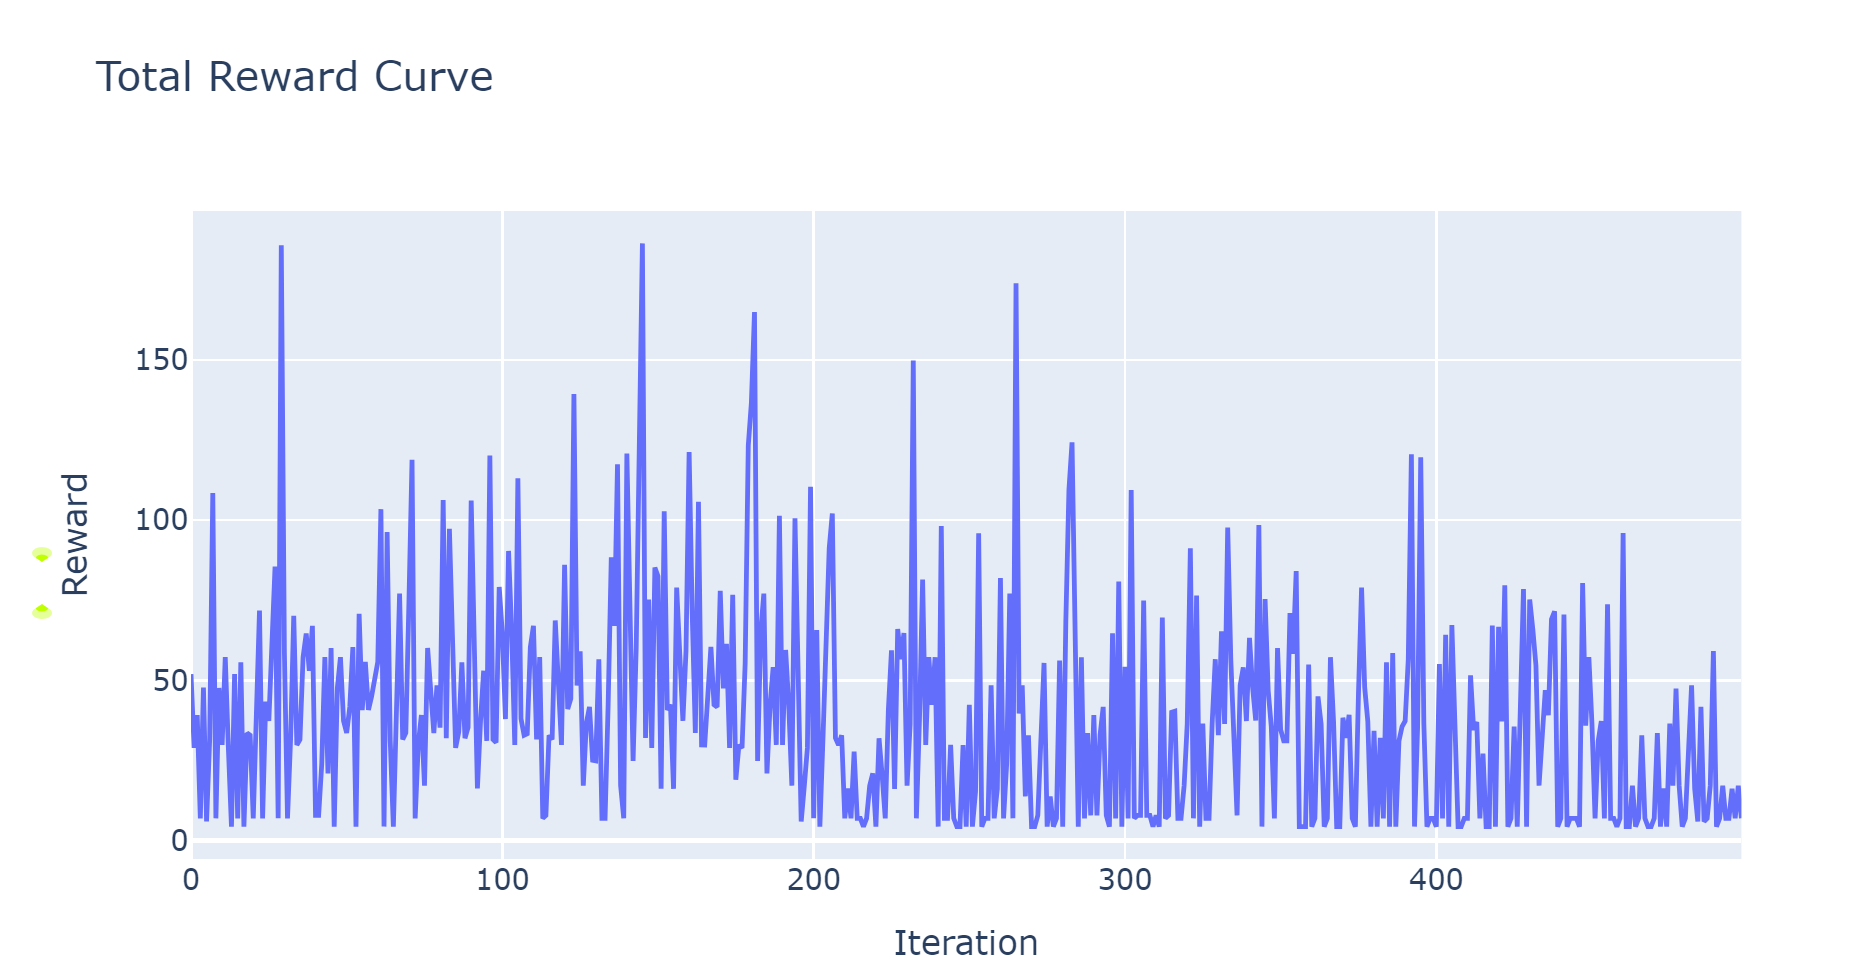
此为`epoch=30`与含较优轨迹学习
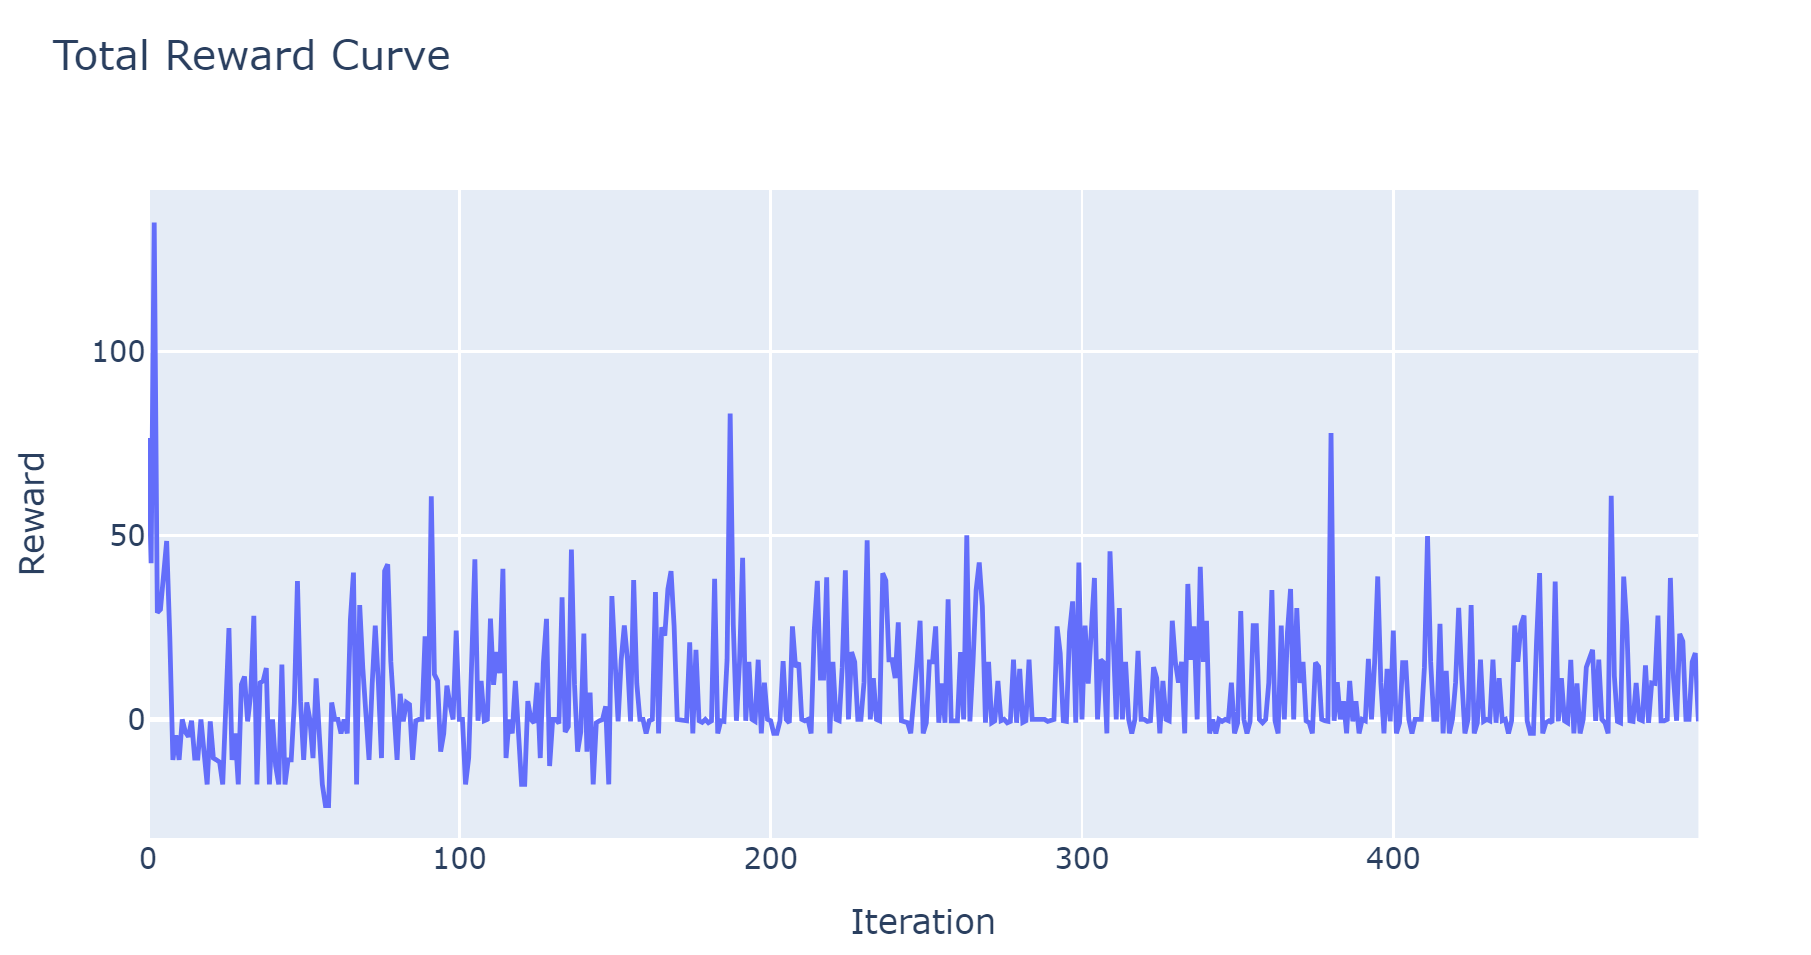
此法将下确界设置为`base_reward`，可见没甚用处（相当于减去`baseline`）

# 2025.03.31

1. 如果每轮都只有一个订单且均能匹配，其实就相当于单智能体。在调试时发生了`2025.03.24`中的错误